<a href="https://colab.research.google.com/github/miransikay/Classification-and-Imputation-with-SVM-and-KNN-on-Numerical-Dataset/blob/main/Classification_and_Imputation_with_SVM_and_KNN_on_Numerical_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Import dataset

In [ ]:
import numpy as np # for data manipulation
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
from sklearn.datasets import make_blobs # sklearn library for making dataset
from sklearn.preprocessing import StandardScaler #standardization


# 2- Assign plot graph as a function.

In [ ]:
def plot_data(X, labels=None, centroids=None, title="Generated Data",hue=None, style=None, palette=None ):
    """  The function used to visualize the data.

Parameters:
    X: array-like
        Data points to be visualized.
    labels: array-like, optional
        Class labels for each data point.
    centroids: array-like, optional
        Centroid points to be displayed in the plot.
    title: str, optional
        Title of the graph.
    style: array-like, optional
        Can be used to specify the style of the data points.
    hue: str, optional
        Can be used to specify the hue of the data points.

  Function that use for data visualization """

    sns.scatterplot(
        x=[point[0] for point in X],
        y=[point[1] for point in X],
        hue=labels,
        style=style,
        palette=palette,
        legend=None
    )
    if centroids is not None:
        plt.plot(
            [x for x, _ in centroids],
            [y for _, y in centroids],
            '+',
            markersize=10,
            color='red'
        )
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()


# 3,1- Use the sklearn.datasets function make_blobs to create groupings of 2-dimensional normal distributions.

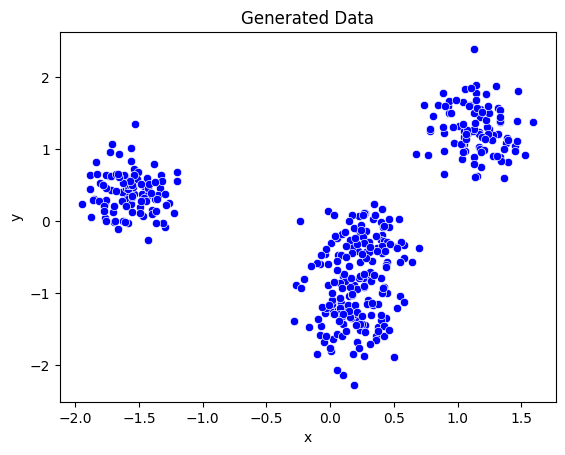

In [ ]:
#Generating data with new parameters

centers = 4
X_train, true_labels = make_blobs(n_samples=400, centers=centers, random_state=123)

# Standardization
X_train = StandardScaler().fit_transform(X_train)

# Visualization
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    color="blue",  # Same color for all point
    legend=None
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()


# 3.2- and assign a label corresponding to the group said point belongs to.

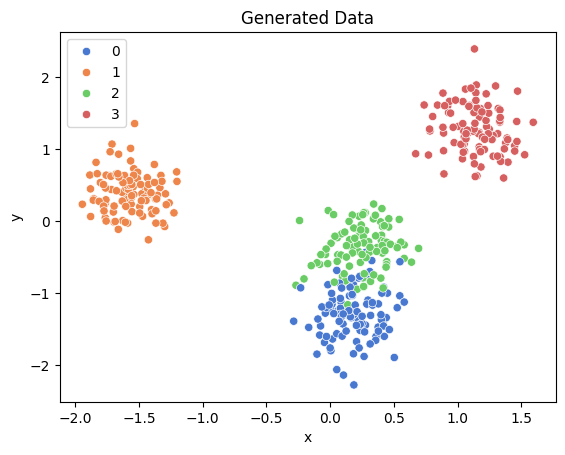

In [ ]:
# Visualization
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    palette="muted",
    legend=True
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Generated Data")
plt.show()

# 4- Define a function that calculates Euclidean distance

In [ ]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data) ** 2, axis=1))


# 5- These k centroids are first randomly initialized, then iterations are performed to optimize the locations of these k centroids as follows:



## 5.1- The distance from each point to each centroid is calculated.



## 5.2- Points are assigned to their nearest centroid.



## 5.3- Centroids are shifted to be the average value of the points belonging to it. If the centroids did not move, the algorithm is finished, else repeat.

In [ ]:
class KMeans:
    def __init__(self, n_clusters=4, max_iter=500):  # Currennt parameters
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroid_steps = []

    def fit(self, X_train):
        # Randomly initialize centrioits
        min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        self.centroids = [np.random.uniform(min_, max_) for _ in range(self.n_clusters)]
        self.centroid_steps.append(self.centroids.copy())  # Save first centrioits
        iteration = 0
        prev_centroids = None

        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Assign all data point to nearest centrioid.
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Calculate new centrioit
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) if cluster else prev_centroids[i]
                              for i, cluster in enumerate(sorted_points)]
            self.centroid_steps.append(self.centroids.copy())  # Save new centrioids
            iteration += 1


    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs


# 6- Display output.

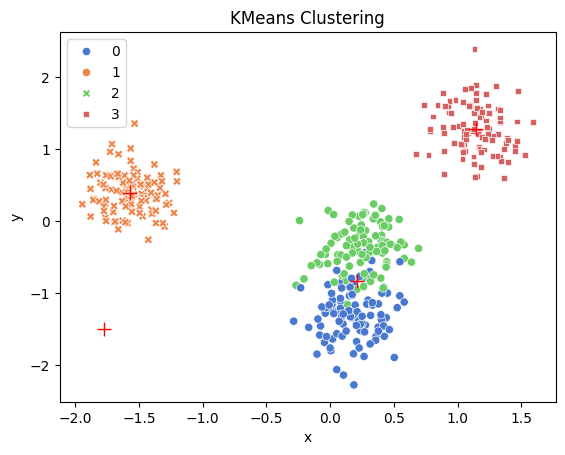

In [ ]:
# Model Creation and Training
kmeans = KMeans(n_clusters=centers)
kmeans.fit(X_train)

#Evaluating the Results

class_centers, classification = kmeans.evaluate(X_train)

# Visualization the result
sns.scatterplot(
    x=[X[0] for X in X_train],
    y=[X[1] for X in X_train],
    hue=true_labels,
    style=classification,
    palette="muted",
    legend=True
)
plt.plot([x for x, _ in kmeans.centroids],
         [y for _, y in kmeans.centroids],
         '+',
         markersize=10,
         color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("KMeans Clustering")
plt.show()


# 7- The positions of the centroids at specific iterations.

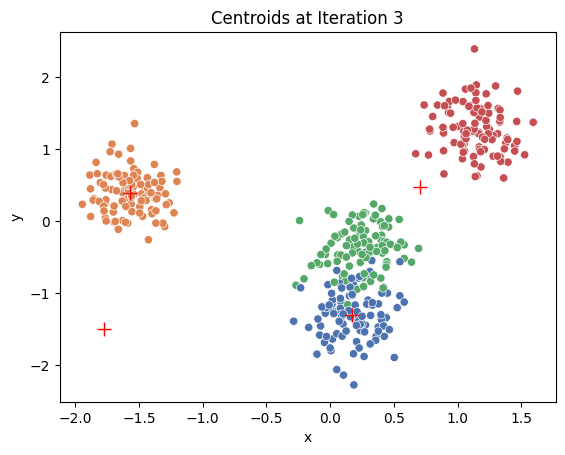

In [ ]:
# Choose iteration
iteration_to_visualize = 2

# Check the centrioids.
if iteration_to_visualize < len(kmeans.centroid_steps):
    centroids_at_iteration = kmeans.centroid_steps[iteration_to_visualize]
    plot_data(X_train, centroids=centroids_at_iteration, title=f"Centroids at Iteration {iteration_to_visualize + 1}",labels=true_labels, style=None, palette="deep")
else:
    print(f"Iteration {iteration_to_visualize + 1} is out of range.")


# 8- Count of centroid_steps

In [ ]:
print(len(kmeans.centroid_steps))  # Check the length of centroid_steps list.


8
